**Análise de Casos de Tuberculose no Brasil entre 2014 a 2019**

1º Semestre ADS - Turma B

Alunas:
Amanda Fernandes e Janaina Marinho


Os dados desta análise estão em https://datasus.saude.gov.br/

O presente arquivo é de domingo, 05 de Julho de 2020.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt

In [2]:
filename = r'C:\Users\Amanda\tuberculose.xlsx'
df = pd.read_excel(filename)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   região      162 non-null    object
 1   estado      162 non-null    object
 2   ano         162 non-null    int64 
 3   casos       162 non-null    int64 
 4   0-14 anos   162 non-null    int64 
 5   15-24 anos  162 non-null    int64 
 6   25-34 anos  162 non-null    int64 
 7   35-44 anos  162 non-null    int64 
 8   45-54 anos  162 non-null    int64 
 9   55-64 anos  162 non-null    int64 
 10  > 65 anos   162 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 12.7+ KB


In [4]:
df.sample(10)

,região,estado,ano,casos,0-14 anos,15-24 anos,25-34 anos,35-44 anos,45-54 anos,55-64 anos,> 65 anos
127,Sudeste,São Paulo,2018,22175,603,4149,5797,4575,3240,2273,1538
120,Nordeste,Pernambuco,2018,5948,219,1073,1370,1112,943,684,546
61,Nordeste,Maranhão,2016,2437,60,410,555,452,364,259,337
3,Norte,Roraima,2014,148,13,19,30,25,30,17,14
159,Centro-Oeste,Mato Grosso,2019,1381,76,176,292,238,200,206,193
72,Sudeste,Rio de Janeiro,2016,13582,353,2709,3089,2512,2158,1652,1099
45,Sudeste,Rio de Janeiro,2015,13366,347,2650,3030,2388,2193,1672,1071
98,Sudeste,Espírito Santo,2017,1320,28,239,298,249,219,159,128
8,Nordeste,Piauí,2014,813,26,87,147,151,145,106,151
14,Nordeste,Sergipe,2014,788,12,161,194,174,104,72,71


In [5]:
regiao = df.groupby('região').sum()['casos'].sort_values(ascending=False)
regiao

região
Sudeste         241509
Nordeste        139976
Sul              73361
Norte            59168
Centro-Oeste     18329
Name: casos, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

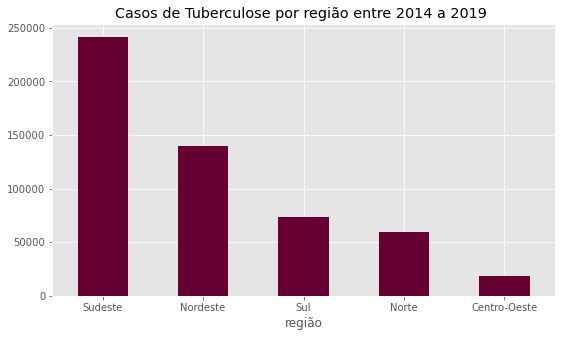

In [6]:
plt.style.use("ggplot")
regiao.loc['Sudeste':'Centro-Oeste'].plot(kind='bar', subplots=True, label="Casos de Tuberculose por região entre 2014 a 2019 " ,figsize=(9, 5), color='#660033')
plt.xticks(rotation=360)

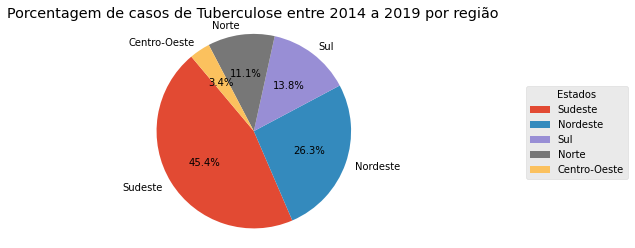

In [7]:
labels = 'Sudeste','Nordeste','Sul','Norte','Centro-Oeste'
sizes = regiao.loc['Sudeste':'Centro-Oeste']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=False,startangle=130)
ax1.legend(title="Estados",
          loc="center left",
          bbox_to_anchor=(1.3, 0, 0.5, 1))

ax1.set_title("Porcentagem de casos de Tuberculose entre 2014 a 2019 por região")
ax1.axis('equal')
plt.show()

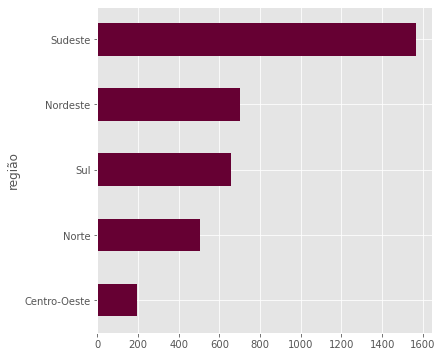

In [8]:
df.groupby('região')['> 65 anos'].max().sort_values().tail(5).plot(kind='barh', figsize=(6,6), color='#660033')

In [9]:
uf = df.groupby('estado').sum()['casos'].sort_values(ascending=False)
uf

estado
São Paulo              125868
Rio de Janeiro          82640
Rio Grande do Sul       38059
Pernambuco              34360
Bahia                   33000
Pará                    26599
Ceará                   24950
Minas Gerais            24856
Amazonas                21265
Paraná                  15203
Maranhão                14492
Santa Catarina          13202
Mato Grosso              8875
Espírito Santo           8145
Paraíba                  8066
Rio Grande do Norte      7853
Alagoas                  7272
Mato Grosso do Sul       6897
Goiás                    6647
Sergipe                  5148
Piauí                    4835
Rondônia                 4306
Acre                     2817
Distrito Federal         2807
Amapá                    1652
Roraima                  1287
Tocantins                1242
Name: casos, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0F8B9790>],
      dtype=object)

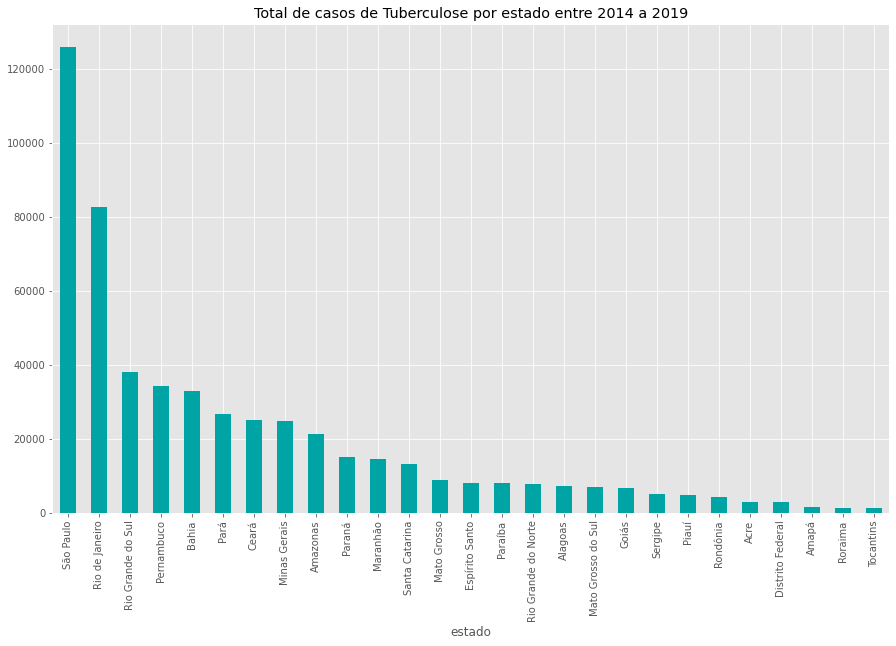

In [10]:
plt.style.use("ggplot")
uf.loc['São Paulo':'Tocantins'].plot(kind='bar', subplots=True, label="Total de casos de Tuberculose por estado entre 2014 a 2019" ,figsize=(15, 9), color='#01A4A4')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

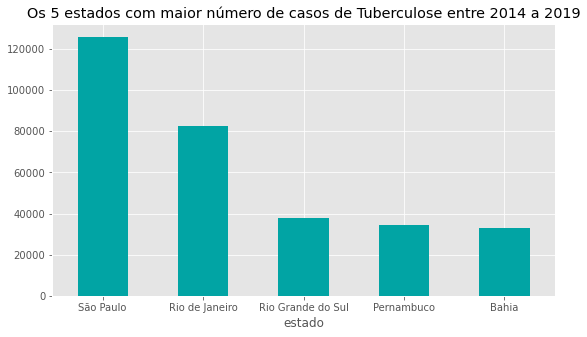

In [11]:
uf.loc['São Paulo':'Bahia']
plt.style.use("ggplot")
uf.loc['São Paulo':'Bahia'].plot(kind='bar', subplots=True, label="Os 5 estados com maior número de casos de Tuberculose entre 2014 a 2019" ,figsize=(9, 5), color='#01A4A4')
plt.xticks(rotation=360)

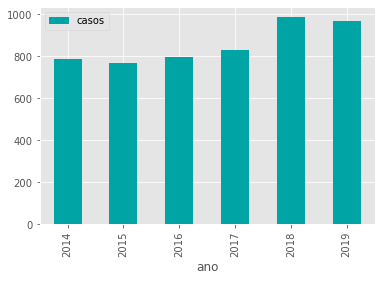

In [12]:
se = df.query('estado == "Sergipe"')
se.tail(6).plot(kind='bar', 
        x='ano', y='casos', color='#01A4A4')